Training set: (1168, 249) Validation set: (292, 249)
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE after hyperparameter tuning: 30028.19096629782


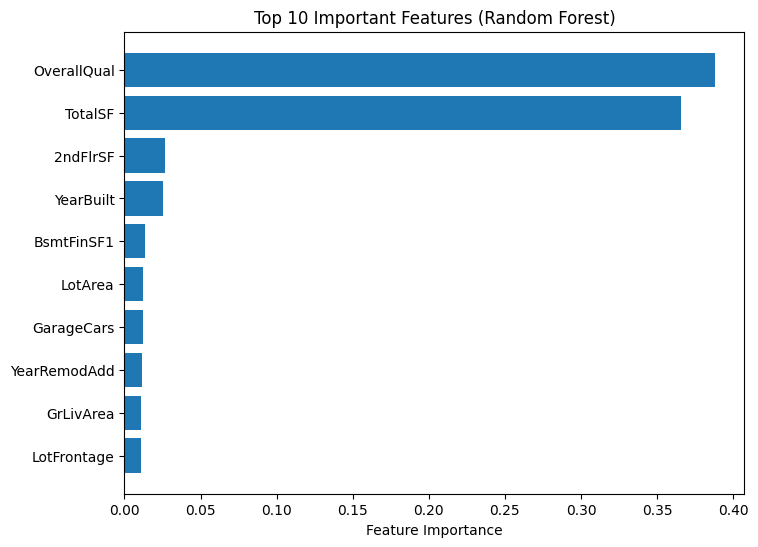

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ======================
# 1) Load cleaned dataset
# ======================
df = pd.read_csv("../data/train_cleaned.csv")

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, "Validation set:", X_val.shape)

# ======================
# 2) Define parameter grid for Random Forest
# ======================
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# ======================
# 3) Run GridSearchCV
# ======================
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nBest parameters found:", grid_search.best_params_)

# ======================
# 4) Evaluate the best model
# ======================
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE after hyperparameter tuning:", rmse)

# ======================
# 5) Feature Importance (Optional)
# ======================
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()
